In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df=pd.read_csv("/content/cardekho_dataset.csv")

In [8]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [10]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [11]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [12]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


In [14]:
df.shape

(15411, 14)

In [15]:
df.nunique()

,0
Unnamed: 0,15411
car_name,121
brand,32
model,120
vehicle_age,24
km_driven,3688
seller_type,3
fuel_type,5
transmission_type,2
mileage,411


In [16]:
df.dtypes

,0
Unnamed: 0,int64
car_name,object
brand,object
model,object
vehicle_age,int64
km_driven,int64
seller_type,object
fuel_type,object
transmission_type,object
mileage,float64


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
null_counts = df.isnull().sum()
print("Null values count per column:")
print(null_counts)


if null_counts.sum() > 0:
    data_no_nulls = df.dropna()
    print(f"Shape after dropping nulls: {data_no_nulls.shape}")
else:
    print("No null values found. No rows were removed.")
    data_no_nulls = df.copy()

Null values count per column:
Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
No null values found. No rows were removed.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers in '{col}':")
    if not outliers.empty:
        display(outliers[[col]])
    else:
        print("No outliers found.")
    print("-" * 30)

Outliers in 'Unnamed: 0':
No outliers found.
------------------------------
Outliers in 'vehicle_age':


,vehicle_age
65,15
161,15
245,16
299,15
344,16
...,...
15019,15
15028,15
15162,15
15316,15


------------------------------
Outliers in 'km_driven':


,km_driven
33,185000
72,160000
84,160000
151,220000
153,170000
...,...
15296,180000
15311,150000
15325,220000
15339,140000


------------------------------
Outliers in 'mileage':


,mileage
169,33.54
182,33.54
317,31.79
480,33.44
693,32.52
...,...
14334,33.44
14853,32.52
14932,31.79
15226,33.54


------------------------------
Outliers in 'engine':


,engine
17,2494
24,2523
29,2982
33,2179
58,2179
...,...
15379,2494
15381,2498
15392,2179
15397,2755


------------------------------
Outliers in 'max_power':


,max_power
12,189.08
77,186.00
111,261.49
129,197.00
139,190.00
...,...
15298,190.00
15306,188.00
15320,187.74
15333,187.70


------------------------------
Outliers in 'seats':


,seats
17,8
24,7
29,7
33,7
40,7
...,...
15381,6
15397,7
15404,7
15407,7


------------------------------
Outliers in 'selling_price':


,selling_price
12,3250000
58,1650000
111,2600000
129,2900000
139,2090000
...,...
15360,1750000
15362,3975000
15384,4450000
15392,2675000


------------------------------


In [21]:
df_no_outliers = df.copy()
for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print("Shape of the dataframe after removing outliers:", df_no_outliers.shape)

Shape of the dataframe after removing outliers: (11066, 14)


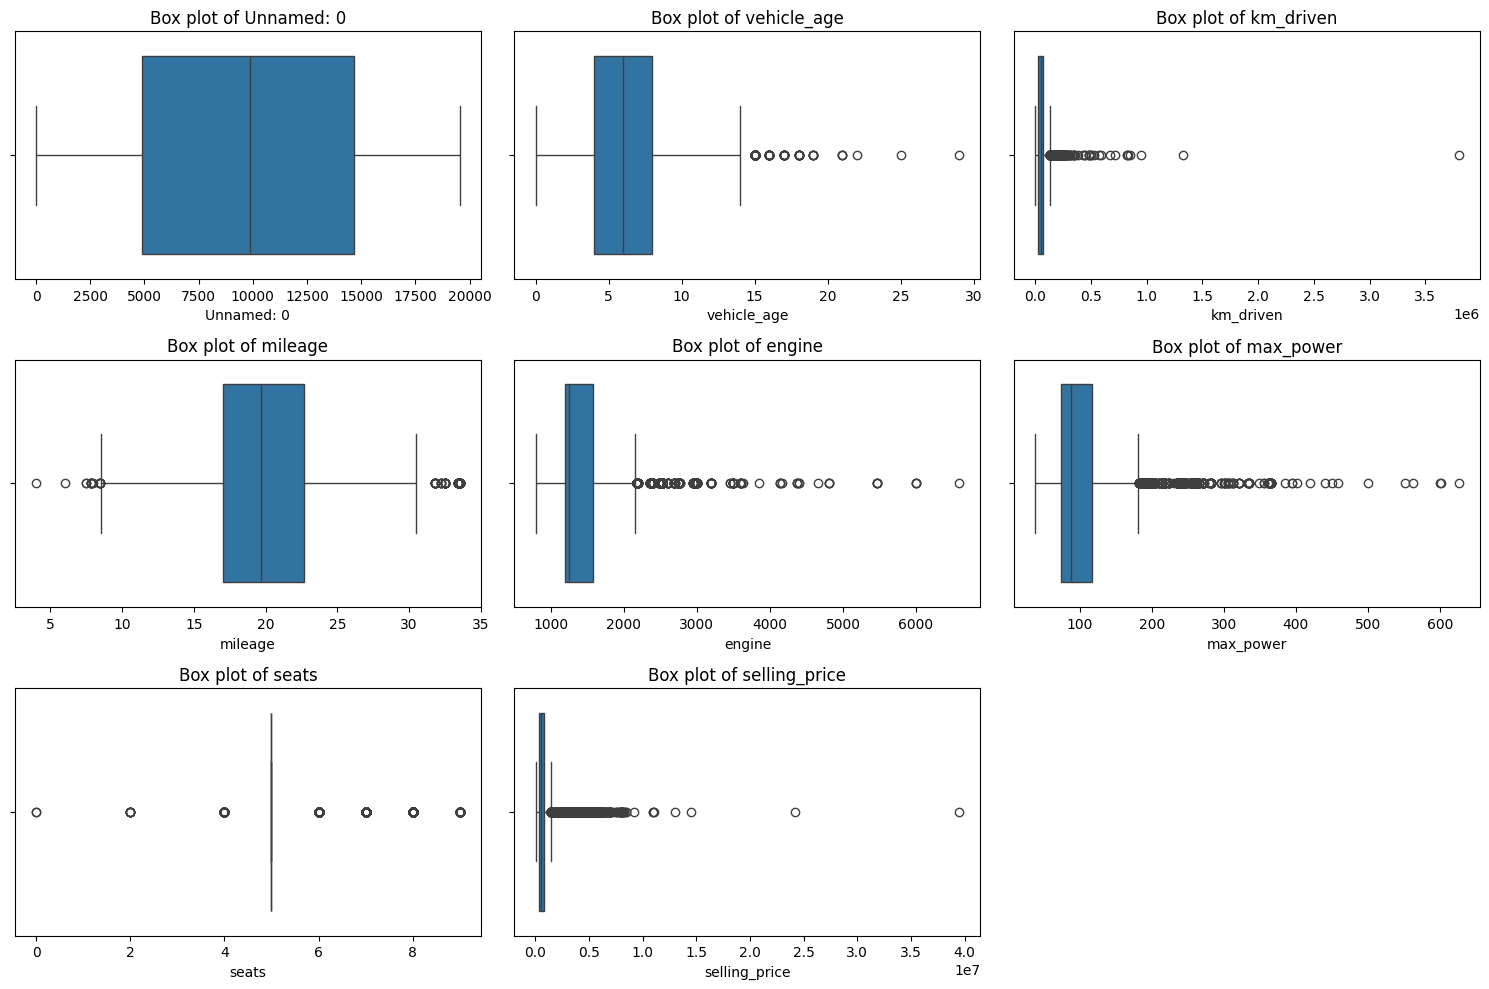

In [22]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [23]:
df.shape

(15411, 14)

In [24]:
df_no_outliers.shape

(11066, 14)

In [25]:
#Linear regression
# --- 1. Define Target and Features ---

# Target variable (what we want to predict)
y = df['selling_price']

# Feature matrix (what we use to make the prediction)
# Drop the target, the unnecessary index, and high-cardinality text features
X = df.drop([
    'selling_price',
    'Unnamed: 0',
    'car_name',
    'brand',
    'model'
], axis=1)

print("--- Features and Target defined ---")
print(f"Target (y): 'selling_price'")
print(f"Features (X) columns: {X.columns.tolist()}")

# --- 2. Define Preprocessing Steps ---

# Identify numerical and categorical features
numerical_features = [
    'vehicle_age',
    'km_driven',
    'mileage',
    'engine',
    'max_power',
    'seats'
]
categorical_features = [
    'seller_type',
    'fuel_type',
    'transmission_type'
]

# Create preprocessing pipeline for numerical features
# 1. StandardScaler: Scales data (e.g., mean=0, std=1)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical features
# 1. OneHotEncoder: Converts categories into binary columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("--- Preprocessing pipeline created ---")

# --- 3. Create and Train the Model ---

# Create the full pipeline: 1. Preprocess, 2. Run Linear Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples")

# Train the model
model_pipeline.fit(X_train, y_train)
print("--- Model training complete ---")

# --- 4. Evaluate the Model ---

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- REGRESSION MODEL RESULTS ---")
print(f"Target: Predict 'selling_price'")
print(f"Model: Linear Regression")
print("\nEvaluation Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared (R2): {r2:.4f}")
print("\n(RMSE shows the model's average prediction error in the same units as the target, 'selling_price'.)")
print(f"(R2 score of {r2:.4f} means that {r2*100:.2f}% of the variance in 'selling_price' is predictable from the features.)")

--- Features and Target defined ---
Target (y): 'selling_price'
Features (X) columns: ['vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']
--- Preprocessing pipeline created ---
Data split: 12328 training samples, 3083 testing samples
--- Model training complete ---

--- REGRESSION MODEL RESULTS ---
Target: Predict 'selling_price'
Model: Linear Regression

Evaluation Metrics:
  Root Mean Squared Error (RMSE): 502095.14
  R-squared (R2): 0.6651

(RMSE shows the model's average prediction error in the same units as the target, 'selling_price'.)
(R2 score of 0.6651 means that 66.51% of the variance in 'selling_price' is predictable from the features.)


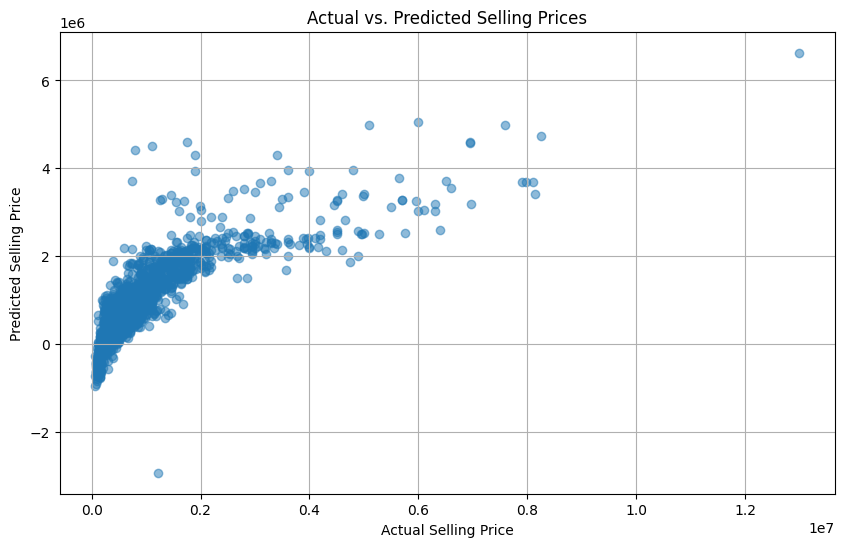

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

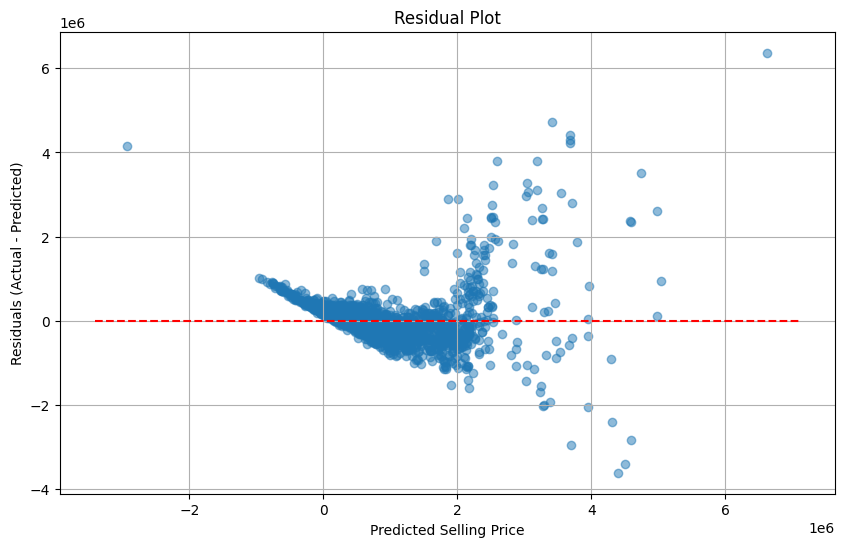

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color='red', linestyle='--')
plt.grid(True)
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the full pipeline: 1. Preprocess, 2. Run Gradient Boosting Regressor
model_pipeline_gbr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42)) # Added random_state for reproducibility
])

# Train the Gradient Boosting Regressor model
model_pipeline_gbr.fit(X_train, y_train)
print("--- Gradient Boosting Regressor Model training complete ---")

# Make predictions on the test set
y_pred_gbr = model_pipeline_gbr.predict(X_test)

# Calculate evaluation metrics
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\n--- GRADIENT BOOSTING REGRESSOR MODEL RESULTS ---")
print(f"Target: Predict 'selling_price'")
print(f"Model: Gradient Boosting Regressor")
print("\nEvaluation Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"  R-squared (R2): {r2_gbr:.4f}")
print("\n(Compare these metrics to the Linear Regression results to see if there's an improvement.)")

--- Gradient Boosting Regressor Model training complete ---

--- GRADIENT BOOSTING REGRESSOR MODEL RESULTS ---
Target: Predict 'selling_price'
Model: Gradient Boosting Regressor

Evaluation Metrics:
  Root Mean Squared Error (RMSE): 263194.22
  R-squared (R2): 0.9080

(Compare these metrics to the Linear Regression results to see if there's an improvement.)


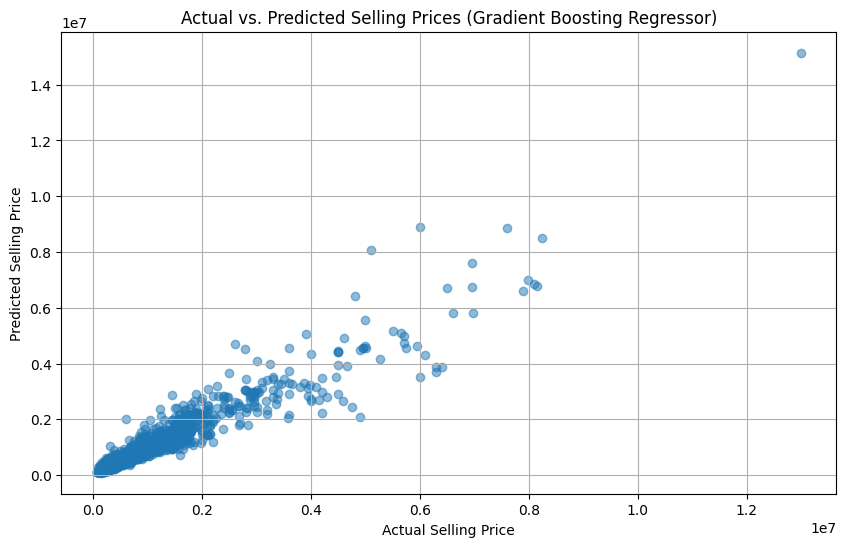

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices (Gradient Boosting Regressor)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Create the full pipeline for Decision Tree Regression
model_pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the Decision Tree Regression model
model_pipeline_dt.fit(X_train, y_train)
print("--- Decision Tree Regressor Model training complete ---")

# Make predictions on the test set
y_pred_dt = model_pipeline_dt.predict(X_test)

# Calculate evaluation metrics for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\n--- DECISION TREE REGRESSOR MODEL RESULTS ---")
print(f"Target: Predict 'selling_price'")
print(f"Model: Decision Tree Regressor")
print("\nEvaluation Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"  R-squared (R2): {r2_dt:.4f}")

--- Decision Tree Regressor Model training complete ---

--- DECISION TREE REGRESSOR MODEL RESULTS ---
Target: Predict 'selling_price'
Model: Decision Tree Regressor

Evaluation Metrics:
  Root Mean Squared Error (RMSE): 307019.78
  R-squared (R2): 0.8748


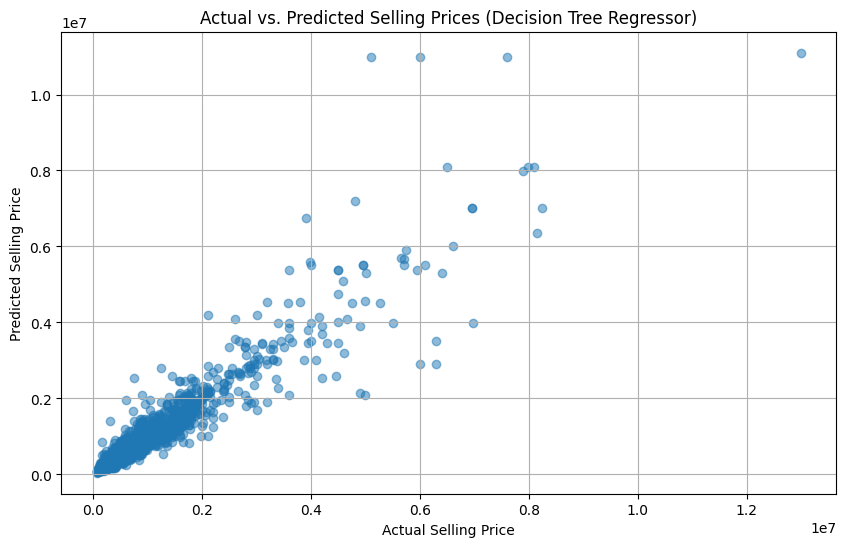

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices (Decision Tree Regressor)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create the full pipeline for Random Forest Regression
model_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the Random Forest Regression model
model_pipeline_rf.fit(X_train, y_train)
print("\n--- Random Forest Regressor Model training complete ---")

# Make predictions on the test set
y_pred_rf = model_pipeline_rf.predict(X_test)

# Calculate evaluation metrics for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- RANDOM FOREST REGRESSOR MODEL RESULTS ---")
print(f"Target: Predict 'selling_price'")
print(f"Model: Random Forest Regressor")
print("\nEvaluation Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R2): {r2_rf:.4f}")


--- Random Forest Regressor Model training complete ---

--- RANDOM FOREST REGRESSOR MODEL RESULTS ---
Target: Predict 'selling_price'
Model: Random Forest Regressor

Evaluation Metrics:
  Root Mean Squared Error (RMSE): 236305.45
  R-squared (R2): 0.9258


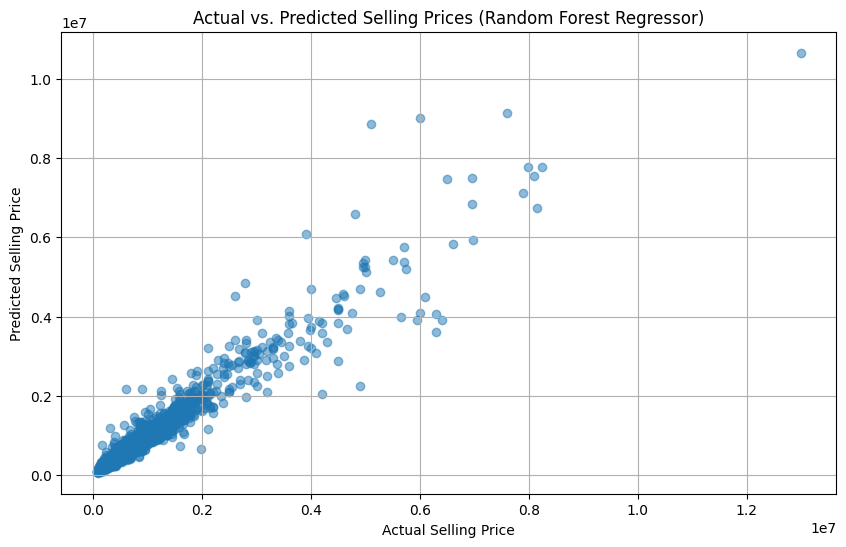

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices (Random Forest Regressor)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

In [32]:
from sklearn.linear_model import Ridge, Lasso

# Create the full pipeline for Ridge Regression
model_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Train the Ridge Regression model
model_pipeline_ridge.fit(X_train, y_train)
print("--- Ridge Regression Model training complete ---")

# Make predictions on the test set
y_pred_ridge = model_pipeline_ridge.predict(X_test)

# Calculate evaluation metrics for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- RIDGE REGRESSION MODEL RESULTS ---")
print(f"Target: Predict 'selling_price'")
print(f"Model: Ridge Regression")
print("\nEvaluation Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"  R-squared (R2): {r2_ridge:.4f}")

--- Ridge Regression Model training complete ---

--- RIDGE REGRESSION MODEL RESULTS ---
Target: Predict 'selling_price'
Model: Ridge Regression

Evaluation Metrics:
  Root Mean Squared Error (RMSE): 502086.74
  R-squared (R2): 0.6651


In [33]:
# Create the full pipeline for Lasso Regression
model_pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42))
])

# Train the Lasso Regression model
model_pipeline_lasso.fit(X_train, y_train)
print("\n--- Lasso Regression Model training complete ---")

# Make predictions on the test set
y_pred_lasso = model_pipeline_lasso.predict(X_test)

# Calculate evaluation metrics for Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- LASSO REGRESSION MODEL RESULTS ---")
print(f"Target: Predict 'selling_price'")
print(f"Model: Lasso Regression")
print("\nEvaluation Metrics:")
print(f"  Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"  R-squared (R2): {r2_lasso:.4f}")


--- Lasso Regression Model training complete ---

--- LASSO REGRESSION MODEL RESULTS ---
Target: Predict 'selling_price'
Model: Lasso Regression

Evaluation Metrics:
  Root Mean Squared Error (RMSE): 502094.38
  R-squared (R2): 0.6651


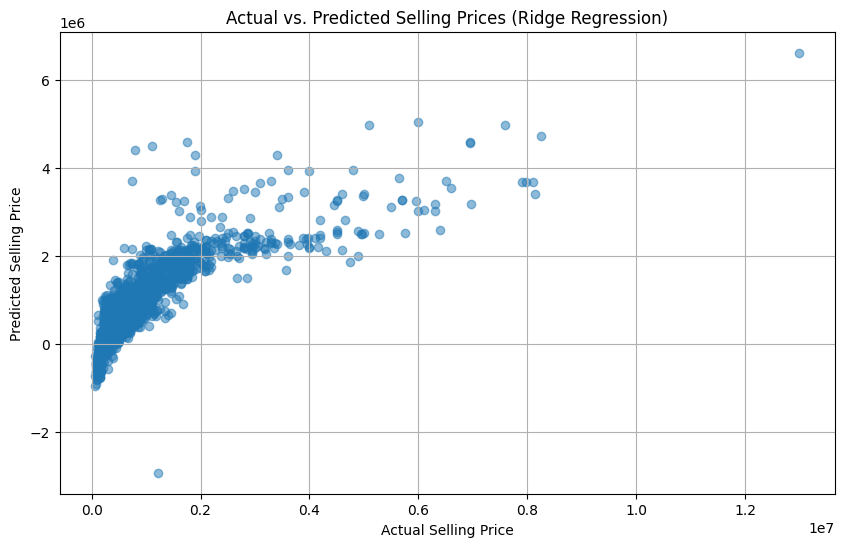

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices (Ridge Regression)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

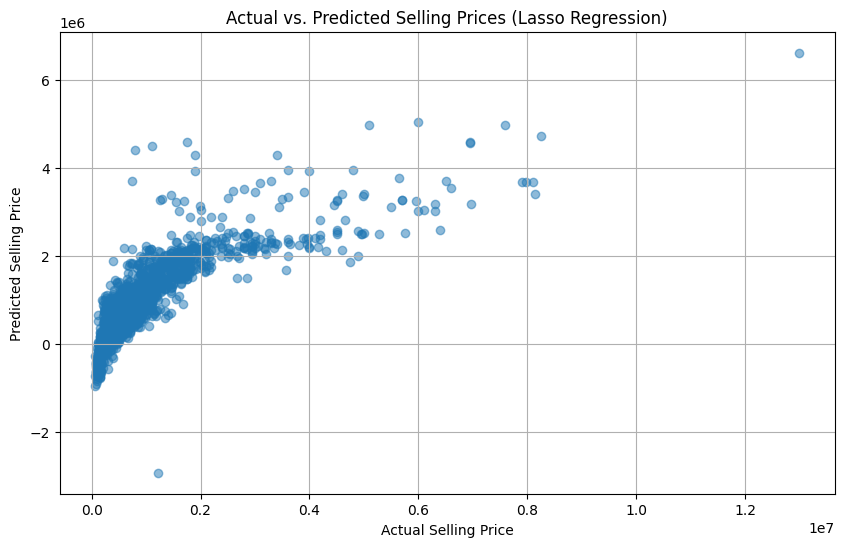

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices (Lasso Regression)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

In [40]:
 #classification